<a href="https://colab.research.google.com/github/vinaysonare/Data-Science-Projects/blob/main/Class_codekata_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns+

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [ ]:
#Clg1
clg1URL='https://drive.google.com/file/d/1H7D-DuXjWsdL8bT3S4AYm0c3WuzxVY2L/view?usp=sharing'
file_id=clg1URL.split('/')[-2]
file_url='https://drive.google.com/uc?id=' + file_id
clg1_df = pd.read_csv(file_url)
#Clg
clg2URL='https://drive.google.com/file/d/1GXM-cmTV490sHWFebbXeV9XoGYzqpqdy/view?usp=sharing'
file_id=clg2URL.split('/')[-2]
file_url='https://drive.google.com/uc?id=' + file_id
clg2_df = pd.read_csv(file_url)

print(clg1_df.describe())
print(clg2_df.describe())
merged_df = pd.concat([clg2_df,clg1_df],ignore_index=True)
merged_df

           python      mysql  Previous Geekions  CodeKata Score      Rising
count   84.000000   84.00000          84.000000       84.000000   84.000000
mean    73.392857   27.60119        2904.523810     2906.071429    1.547619
std     35.589280   36.30562        4372.425826     4374.184197   14.184163
min      0.000000    0.00000           0.000000        0.000000    0.000000
25%     52.250000    0.00000         292.500000      292.500000    0.000000
50%     90.250000   11.62500        1580.000000     1580.000000    0.000000
75%    100.000000   41.00000        3727.500000     3727.500000    0.000000
max    100.000000  100.00000       24500.000000    24500.000000  130.000000
           python   python_en  ...  CodeKata Score       Rising
count   35.000000   35.000000  ...       35.000000    35.000000
mean     8.657143   29.657143  ...     6801.428571   708.285714
std     25.795511   30.582524  ...     3765.281134   836.429687
min     -1.000000   -1.000000  ...        0.000000     0.000

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100.0,0.0,31.0,9.0,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0.0,20.0,0.0,0.0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1.0,55.0,24.0,6.0,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1.0,0.0,35.0,-1.0,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1.0,100.0,24.0,-1.0,9150,9150,Electronics and Electrical Engineering,0
...,...,...,...,...,...,...,...,...,...
114,KarthikeyanS,45.0,NaN,0.0,NaN,0,0,Electronics and Electrical Engineering,0
115,BARATH.P,29.0,NaN,0.0,NaN,0,0,Electronics and Electrical Engineering,0
116,N.Ajith kumar,82.0,NaN,0.0,NaN,0,0,Electronics and Electrical Engineering,0
117,mohamed nabi,0.0,NaN,0.0,NaN,0,0,Electronics and Electrical Engineering,0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [ ]:
exceed_expct_df = merged_df[merged_df['CodeKata Score'] >= 15000]
reached_expct_df = merged_df[(merged_df['CodeKata Score']>=10000) & (merged_df['CodeKata Score']<15000)]
needs_improvement_df = merged_df[(merged_df['CodeKata Score']>=7000) & (merged_df['CodeKata Score']<10000)]
unsatisfactory_df = merged_df[merged_df['CodeKata Score'] < 7000]

In [ ]:
exceed_expct_df.to_csv('Exceeded expectations.csv',index=False)
reached_expct_df.to_csv('Reached_expectations.csv',index=False)
needs_improvement_df.to_csv('Needs_Improvement.csv',index=False)
unsatisfactory_df.to_csv('Unsatisfactory.csv',index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [ ]:
prevweek_avg_geekoins = merged_df[['Previous Geekions']].mean()
thisweek_avg_geekoins = merged_df[['CodeKata Score']].mean()
print('Average of previous week geekoins: {0}'.format(prevweek_avg_geekoins))
print('Average of this week geekoins: {0}'.format(thisweek_avg_geekoins))

Average of previous week geekoins: Previous Geekions    3842.352941
dtype: float64
Average of this week geekoins: CodeKata Score    4051.764706
dtype: float64


###### No of students participated 

In [ ]:
no_of_students = len(merged_df.index)
print('No of students participated:', no_of_students)

No of students participated: 119


###### #Average completion of python course or my_sql or python english or computational thinking

In [ ]:
#Converting all negetive values to 0 to get mean
merged_df.python = merged_df.python.mask(merged_df.python < 0, 0)
merged_df.python_en = merged_df.python_en.mask(merged_df.python_en < 0, 0)
merged_df.mysql = merged_df.mysql.mask(merged_df.mysql < 0, 0)
merged_df.computational_thinking = merged_df.computational_thinking.mask(merged_df.computational_thinking < 0, 0)
print('Average completion of python: ',merged_df.python.mean(skipna=True))
print('Average completion of my_sql: ',merged_df.mysql.mean(skipna=True))
print('Average completion of python english: ',merged_df.python_en.mean(skipna=True))
print('Average completion of computational thinking: ',merged_df.computational_thinking.mean(skipna=True))

Average completion of python:  54.57983193277311
Average completion of my_sql:  23.516806722689076
Average completion of python english:  29.742857142857144
Average completion of computational thinking:  2.4


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [ ]:
#sorting and getting top 3 
risingstars = merged_df.sort_values(by = ['Rising'],ascending=False).head(3)
print(risingstars)
print('Top 3 candidate who performed well in that particular week are: ', *risingstars.Name )

                 Name  python  ...                              Department  Rising
8            shifak N    58.0  ...  Electronics and Electrical Engineering    3140
2   Ganesh Ramkumar R     0.0  ...        Computer Science and Engineering    2000
18     Narasimhan Y L     0.0  ...        Computer Science and Engineering    2000

[3 rows x 9 columns]
Top 3 candidate who performed well in that particular week are:  shifak N Ganesh Ramkumar R Narasimhan Y L


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [ ]:
shiningstars = merged_df.sort_values(by = ['CodeKata Score'],ascending=False).head(3)
print(shiningstars)
print('Top 3 candidate who has highest geekions are: ', *shiningstars.Name )

           Name  python  ...                        Department  Rising
35    A.Dharani    82.0  ...  Computer Science and Engineering       0
36  V.JEEVITHA     82.0  ...  Computer Science and Engineering       0
37  HEMAVATHI.R   100.0  ...  Computer Science and Engineering       0

[3 rows x 9 columns]
Top 3 candidate who has highest geekions are:  A.Dharani V.JEEVITHA  HEMAVATHI.R


###### Department wise codekata performence (pie chart)

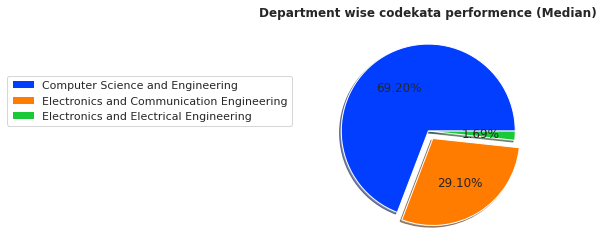

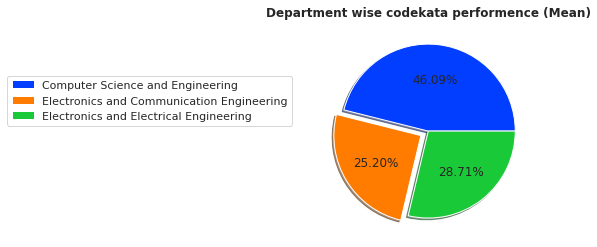

In [ ]:
grped = merged_df.groupby(['Department'])
grped.describe()
# Department wise codekata performence- median
y = grped['CodeKata Score'].median()
colors = sns.color_palette('bright')[0:3]
explode = [0,0.1,0]
plt.pie(y.values,colors = colors,autopct = '%0.2f%%',shadow=True,radius=1,explode = explode)
plt.title("Department wise codekata performence (Median)",fontweight="bold")
plt.legend(y.index,loc='lower right',bbox_to_anchor=(-0.1, 0.5))
plt.show()
# Department wise codekata performence- Mean
y = grped['CodeKata Score'].mean()
plt.pie(y.values,colors = colors,autopct = '%0.2f%%',shadow=True,radius=1,explode = explode)
plt.legend(y.index,loc='lower right',bbox_to_anchor=(-0.1, 0.5))
plt.title("Department wise codekata performence (Mean)",fontweight="bold")
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

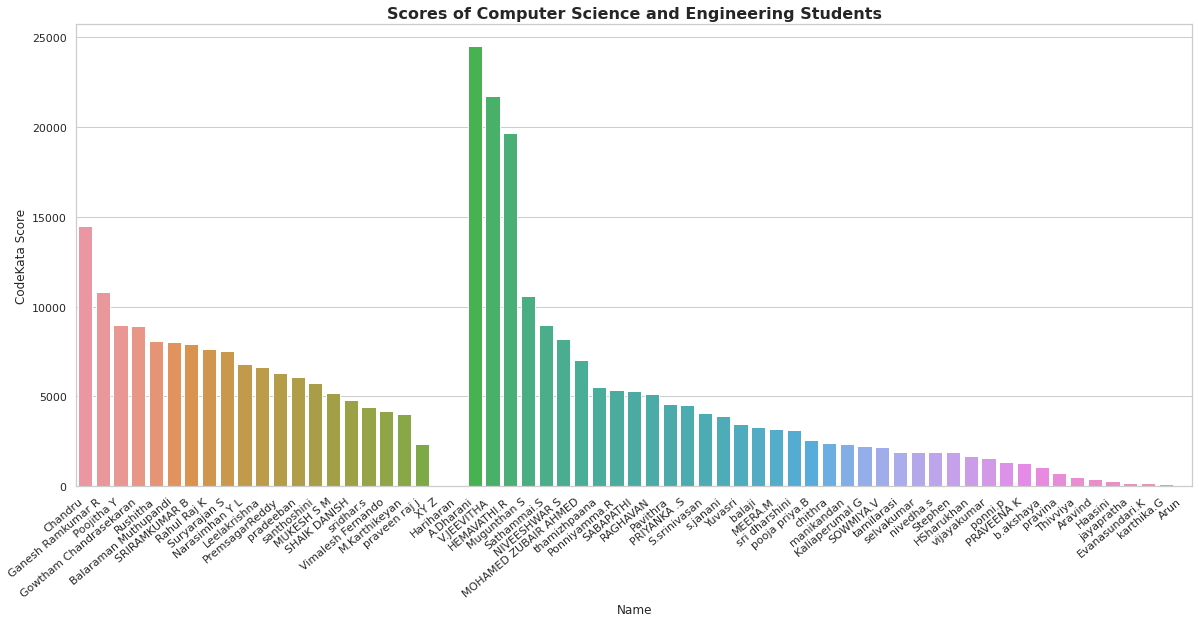

In [ ]:
cseToppers = merged_df.loc[merged_df['Department'] == y.index[0]]
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_theme(style="whitegrid")
sns.barplot(x = 'Name',y = 'CodeKata Score',data = cseToppers)
ax.set_title('Scores of Computer Science and Engineering Students', size=16,fontweight="bold")
plt.show()

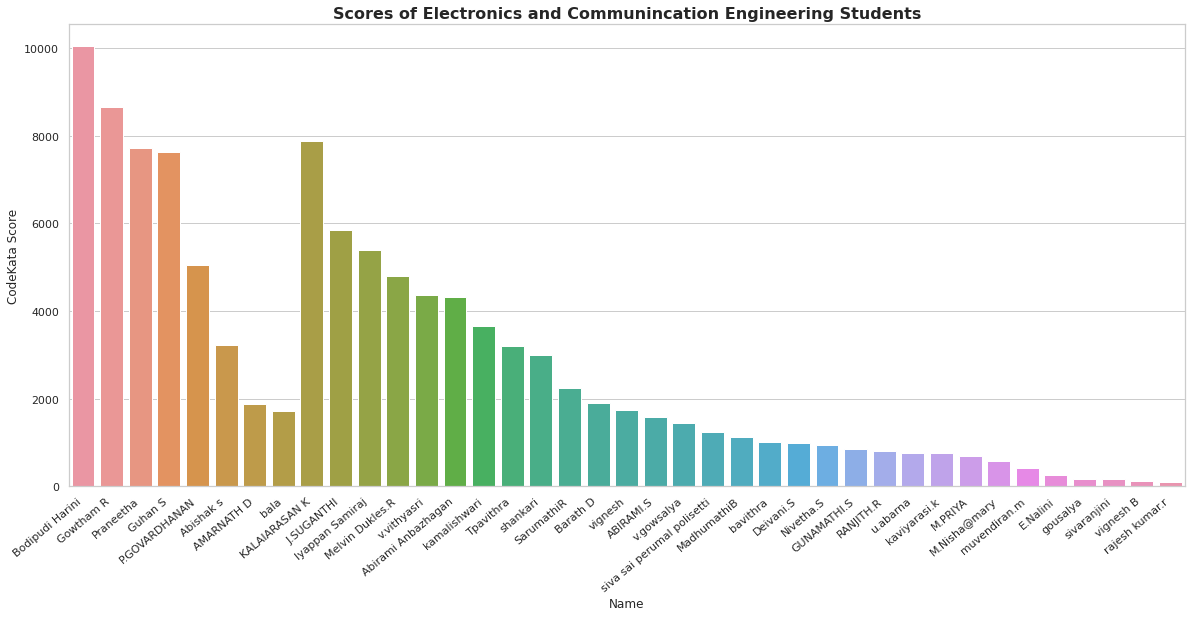

In [ ]:
eceToppers = merged_df.loc[merged_df['Department'] == y.index[1]]
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.barplot(x = 'Name',y = 'CodeKata Score',data = eceToppers)
ax.set_title('Scores of Electronics and Communincation Engineering Students', size=16,fontweight="bold")
plt.show()

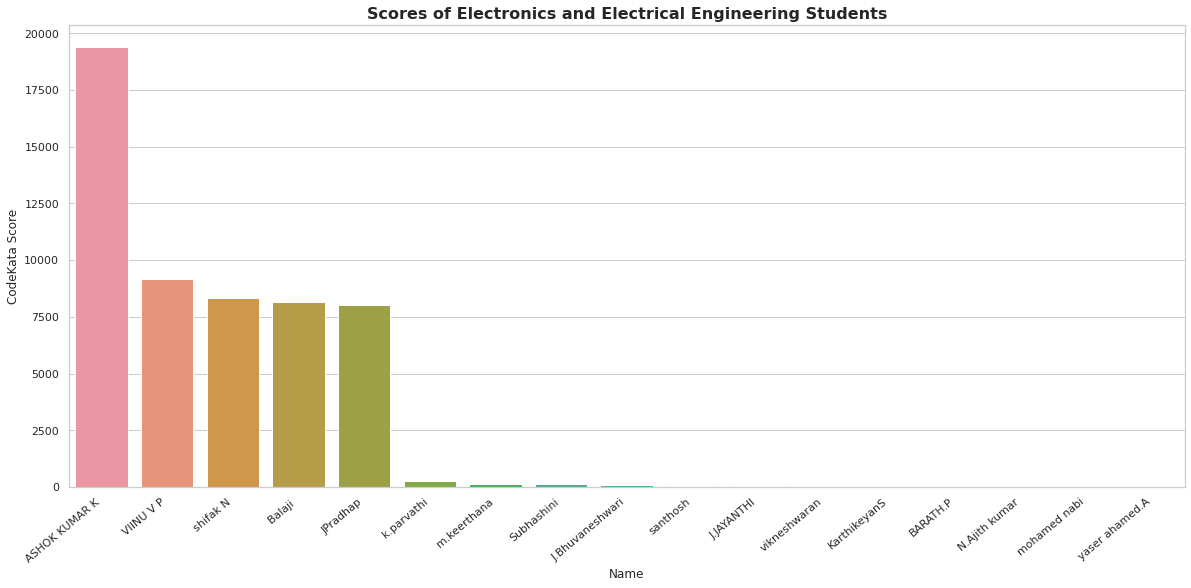

In [ ]:
eeeToppers = merged_df.loc[merged_df['Department'] == y.index[2]]
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.barplot(x = 'Name',y = 'CodeKata Score',data = eeeToppers)
ax.set_title('Scores of Electronics and Electrical Engineering Students', size=16,fontweight="bold")
plt.show()

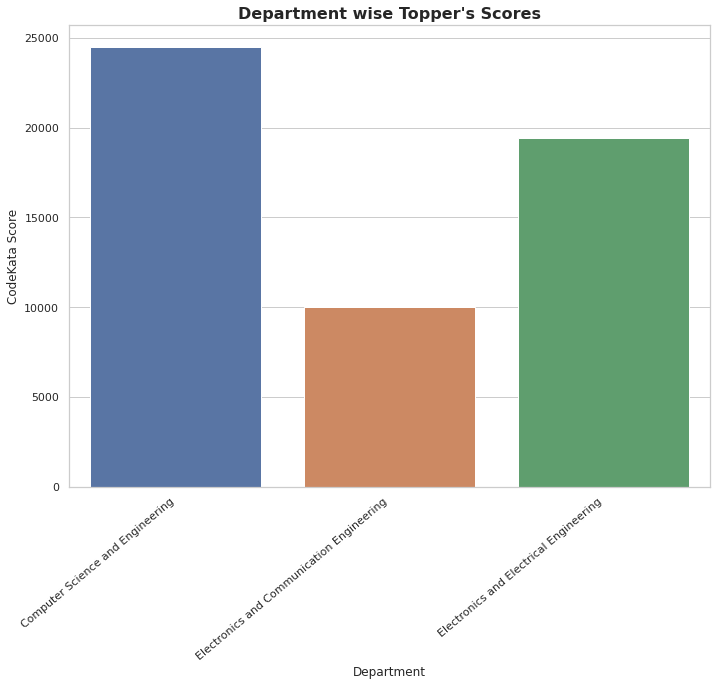

In [ ]:
deptToppers = merged_df.groupby('Department').agg({'CodeKata Score':'max'})[['CodeKata Score']].reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 8.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.barplot(x = 'Department',y = 'CodeKata Score',data = deptToppers)
ax.set_title("Department wise Topper's Scores", size=16,fontweight="bold")
plt.show()